In [6]:
import pandas as pd
from sklearn.datasets import make_classification

# Generate new synthetic data with adjusted parameters for increased challenge
X, y = make_classification(
    n_samples=1000,          # Same number of samples
    n_features=30,           # Increased number of features
    n_informative=8,         # Decreased informative features (relative to total)
    n_redundant=10,          # Increased redundant features
    n_repeated=5,            # Added repeated features
    n_classes=2,             # Binary classification
    weights=[0.6, 0.4],      # Imbalanced classes to make it harder
    class_sep=0.7,           # Decreased class separation
    random_state=42
)

# Convert to pandas DataFrame and Series
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
y = pd.Series(y, name='churn')

print("Generated features (X) with increased complexity:")
print(X.head())
print("\nGenerated target variable (y) with increased complexity:")
print(y.head())

Generated features (X) with increased complexity:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.337716   0.364086  -0.782210  -4.098798  -2.804223   3.730129   
1  -0.163253   0.666632   2.037508   0.623275   0.992289  -0.192257   
2   0.933679  -1.284909   0.802254  -0.837023   0.695283   0.617820   
3  -0.558172   0.862625   2.471897   0.729751   4.659274  -2.434608   
4   0.415381   5.535716   1.161505  -1.636607   4.364138  -2.875692   

   feature_6  feature_7  feature_8  feature_9  ...  feature_20  feature_21  \
0   3.730129  -4.561765   0.364086  -0.900044  ...   -1.535140   -4.777776   
1  -0.192257  -0.978554   0.666632  -0.027133  ...   -2.279795    1.632527   
2   0.617820  -0.802134  -1.284909   0.397328  ...   -0.721580   -3.191258   
3  -2.434608   2.040075   0.862625  -0.373269  ...    2.138459    3.861314   
4  -2.875692  -0.555722   5.535716  -2.774852  ...   -0.656233    6.458200   

   feature_22  feature_23  feature_24  feature_25  fea

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 1. Split the new data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=42)

print("New data split into training and testing sets.")
print(f"X_train_new shape: {X_train_new.shape}")
print(f"X_test_new shape: {X_test_new.shape}")
print(f"y_train_new shape: {y_train_new.shape}")
print(f"y_test_new shape: {y_test_new.shape}\n")

# 2. Instantiate Logistic Regression model
lr_model_new = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000) # Increased max_iter for convergence on potentially harder data

# 3. Train the Logistic Regression model
lr_model_new.fit(X_train_new, y_train_new)
print("Logistic Regression model trained successfully on new data.\n")

# 4. Make predictions on X_test_new
y_pred_lr_new = lr_model_new.predict(X_test_new)

# 5. Calculate evaluation metrics
accuracy_lr_new = accuracy_score(y_test_new, y_pred_lr_new)
precision_lr_new = precision_score(y_test_new, y_pred_lr_new)
recall_lr_new = recall_score(y_test_new, y_pred_lr_new)

# 6. Print the metrics
print("--- Logistic Regression Model Performance on NEW Data ---")
print(f"Accuracy: {accuracy_lr_new:.4f}")
print(f"Precision: {precision_lr_new:.4f}")
print(f"Recall: {recall_lr_new:.4f}")

New data split into training and testing sets.
X_train_new shape: (800, 30)
X_test_new shape: (200, 30)
y_train_new shape: (800,)
y_test_new shape: (200,)

Logistic Regression model trained successfully on new data.

--- Logistic Regression Model Performance on NEW Data ---
Accuracy: 0.6650
Precision: 0.5088
Recall: 0.4265


In [8]:
from sklearn.tree import DecisionTreeClassifier

# 1. Instantiate Decision Tree model
dt_model_new = DecisionTreeClassifier(random_state=42)

# 2. Train the Decision Tree model on new data
dt_model_new.fit(X_train_new, y_train_new)
print("Decision Tree model trained successfully on new data.\n")

# 3. Make predictions on X_test_new
y_pred_dt_new = dt_model_new.predict(X_test_new)

# 4. Calculate evaluation metrics
accuracy_dt_new = accuracy_score(y_test_new, y_pred_dt_new)
precision_dt_new = precision_score(y_test_new, y_pred_dt_new)
recall_dt_new = recall_score(y_test_new, y_pred_dt_new)

# 5. Print the metrics
print("--- Decision Tree Model Performance on NEW Data ---")
print(f"Accuracy: {accuracy_dt_new:.4f}")
print(f"Precision: {precision_dt_new:.4f}")
print(f"Recall: {recall_dt_new:.4f}")

Decision Tree model trained successfully on new data.

--- Decision Tree Model Performance on NEW Data ---
Accuracy: 0.7050
Precision: 0.5506
Recall: 0.7206


In [9]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instantiate Random Forest model
rf_model_new = RandomForestClassifier(random_state=42)

# 2. Train the Random Forest model on new data
rf_model_new.fit(X_train_new, y_train_new)
print("Random Forest model trained successfully on new data.\n")

# 3. Make predictions on X_test_new
y_pred_rf_new = rf_model_new.predict(X_test_new)

# 4. Calculate evaluation metrics
accuracy_rf_new = accuracy_score(y_test_new, y_pred_rf_new)
precision_rf_new = precision_score(y_test_new, y_pred_rf_new)
recall_rf_new = recall_score(y_test_new, y_pred_rf_new)

# 5. Print the metrics
print("--- Random Forest Model Performance on NEW Data ---")
print(f"Accuracy: {accuracy_rf_new:.4f}")
print(f"Precision: {precision_rf_new:.4f}")
print(f"Recall: {recall_rf_new:.4f}")

Random Forest model trained successfully on new data.

--- Random Forest Model Performance on NEW Data ---
Accuracy: 0.8650
Precision: 0.8060
Recall: 0.7941


## Compare Models with a Bar Chart

### Subtask:
Create a bar chart comparing the precision, accuracy, and recall of all three trained models on the new, more challenging data. Ensure the plot has a clear legend for each metric and model.


**Reasoning**:
I will import `matplotlib.pyplot`, create a Pandas DataFrame with the evaluation metrics for each model on the new dataset, and then generate a grouped bar chart to visualize and compare their performance, including a title, axis labels, and a legend as instructed.



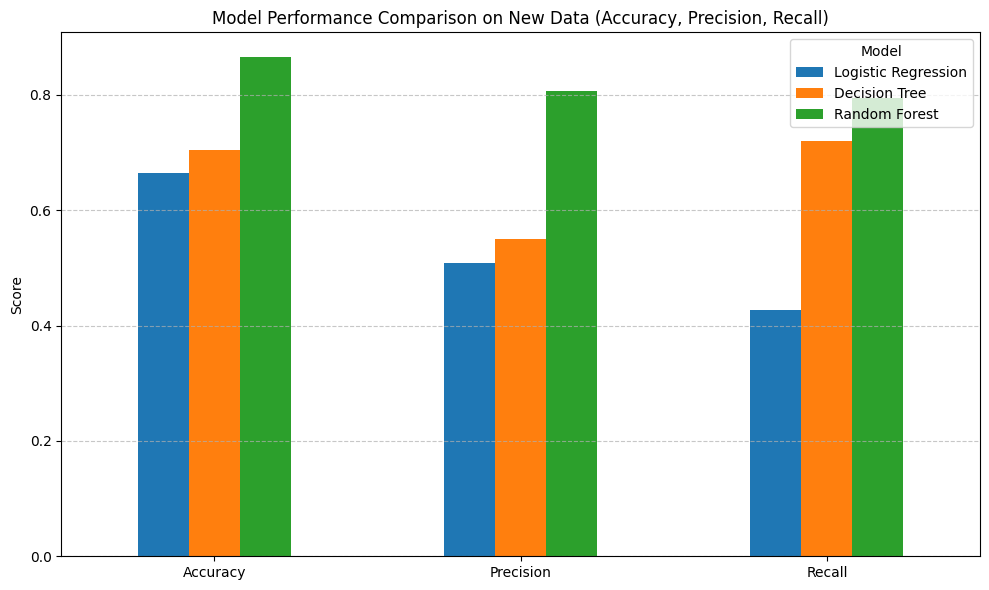

In [10]:
import matplotlib.pyplot as plt

# Create a DataFrame to store the metrics for the new data
metrics_data_new = {
    'Logistic Regression': [accuracy_lr_new, precision_lr_new, recall_lr_new],
    'Decision Tree': [accuracy_dt_new, precision_dt_new, recall_dt_new],
    'Random Forest': [accuracy_rf_new, precision_rf_new, recall_rf_new]
}

metrics_df_new = pd.DataFrame(metrics_data_new, index=['Accuracy', 'Precision', 'Recall'])

# Plotting the grouped bar chart
metrics_df_new.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison on New Data (Accuracy, Precision, Recall)')
plt.ylabel('Score')
plt.xticks(rotation=0) # Ensure x-axis labels are readable
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()